In [25]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [26]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [27]:
train_images = train_images.astype('float32') / 255.0
test_images =test_images.astype('float32') / 255.0

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

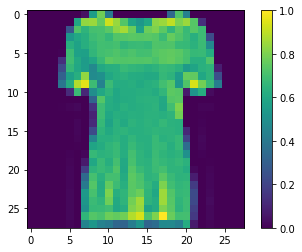

In [29]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

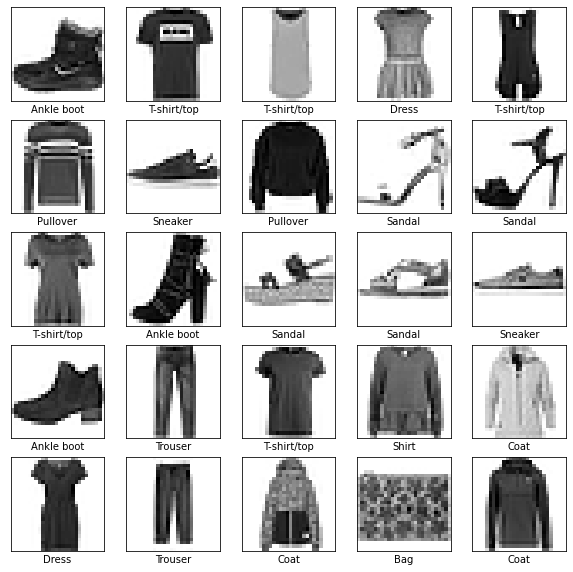

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [31]:
val_images, train_images= train_images[:3000], train_images[3000:] 
val_labels, train_labels = train_labels[:3000], train_labels[3000:]

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
       tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(16, activation='relu'),
             tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
history = model.fit(train_images
                    ,train_labels
                    ,epochs=10
                    ,batch_size=512
                    ,validation_data=(val_images,val_labels)
                                                                                                                              
                   )

Epoch 1/10
112/112 [==============================] - 1s 5ms/step - loss: 1.7847 - accuracy: 0.4073 - val_loss: 1.1219 - val_accuracy: 0.7163
Epoch 2/10
112/112 [==============================] - 0s 3ms/step - loss: 1.0437 - accuracy: 0.7338 - val_loss: 0.9181 - val_accuracy: 0.7577
Epoch 3/10
112/112 [==============================] - 0s 3ms/step - loss: 0.8535 - accuracy: 0.7660 - val_loss: 0.8013 - val_accuracy: 0.7843
Epoch 4/10
112/112 [==============================] - 0s 3ms/step - loss: 0.7637 - accuracy: 0.7977 - val_loss: 0.7042 - val_accuracy: 0.8227
Epoch 5/10
112/112 [==============================] - 0s 4ms/step - loss: 0.6402 - accuracy: 0.8254 - val_loss: 0.5337 - val_accuracy: 0.7680
Epoch 6/10
112/112 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.8268 - val_loss: 0.4077 - val_accuracy: 0.8643
Epoch 7/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3683 - accuracy: 0.8749 - val_loss: 0.4199 - val_accuracy: 0.8573
Epoch 

In [35]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3839 - accuracy: 0.8680

Test accuracy: 0.8679999709129333


In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

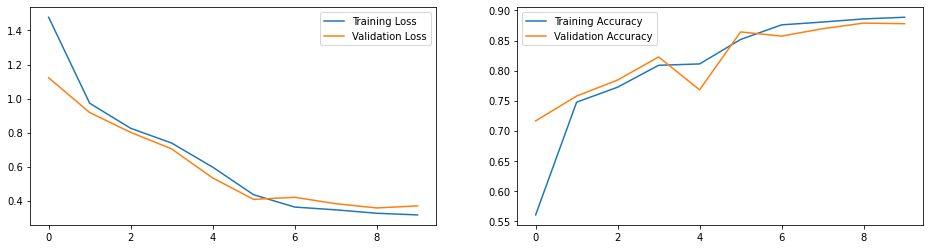

In [38]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [39]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3839 - accuracy: 0.8680
0.38394057750701904
0.8679999709129333


In [40]:
predictions = model.predict(test_images)

In [41]:
print(predictions)

[[  4.865913   -26.122196    -1.9838243  ...  14.078798     6.1609635
   15.739969  ]
 [ -7.326807    -7.1156473   13.863555   ...   1.2274355    2.88622
    1.5091126 ]
 [  4.5658665   12.638914    -5.7762694  ...  -9.580685    -5.5101285
  -20.836096  ]
 ...
 [  1.4767524   -7.5670156   -3.7080252  ...  -2.0393398    9.14366
   -0.04148698]
 [  3.4910839   10.24562     -4.5431914  ...  -7.6271086   -4.4318266
  -16.66271   ]
 [  3.944943   -27.49924      2.972434   ...   7.122349     4.921309
    3.8625793 ]]


In [42]:
import numpy as np

print(np.argmax(predictions[0]))

9


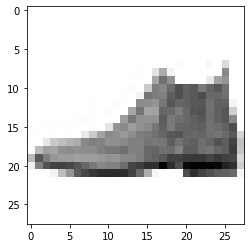

In [43]:
plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.show()

In [44]:
pred_classes = np.argmax(model.predict(train_images), axis=-1)
pred_classes

array([6, 3, 2, ..., 3, 0, 5])

In [45]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[4859,    5,   56,   64,    5,    1,  690,    1,   37,    0],
       [  46, 5502,   22,   83,    6,    0,   17,    0,    3,    0],
       [  52,    2, 4539,   44,  543,    1,  521,    0,    8,    0],
       [ 300,   49,   38, 4882,  160,    0,  255,    0,    4,    0],
       [  12,    1,  391,  191, 4763,    0,  331,    0,    8,    0],
       [   5,    0,    1,    0,    0, 5405,    2,  222,    5,   60],
       [ 598,    2,  332,   89,  389,    0, 4245,    0,   47,    0],
       [   0,    0,    0,    0,    0,   20,    0, 5590,    2,   76],
       [  23,    3,   20,   12,   11,    4,   65,   19, 5555,    1],
       [   1,    0,    0,    0,    0,   13,    0,  266,    2, 5423]],
      dtype=int32)>

In [46]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

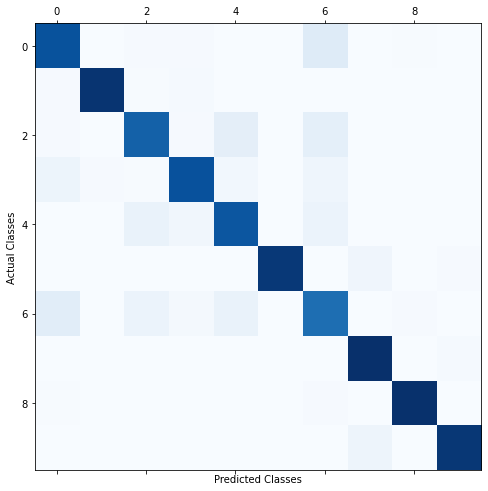

In [47]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()